In [32]:
import pandas as pd

import matplotlib.pyplot as plt


In [90]:
dfmain_movie = pd.read_csv("Benchmark/Movie/benchmark_zeiten_main.csv")
dfmain_movie_small = pd.read_csv("Benchmark/Movie_Comp/benchmark_zeiten_main_movie_small.csv")
dfmain_who =pd.read_csv("Benchmark/Who/benchmark_zeiten_main_drwho.csv")
dfmain_fraud = pd.read_csv("Benchmark/Fraud/benchmark_zeiten_main_fraud.csv")


In [91]:
dfgrouping_movie = pd.read_csv("Benchmark/Movie/benchmark_zeiten_grouping_movie_big.csv")
dfgrouping_movie_small = pd.read_csv("Benchmark/Movie_Comp/benchmark_zeiten_grouping_movie_small.csv")
dfgrouping_who = pd.read_csv("Benchmark/Who/benchmark_zeiten_grouping_dr_who.csv")
dfgrouping_fraud = pd.read_csv("Benchmark/Fraud/benchmark_zeiten_grouping_fraud.csv")

In [92]:
dfmapping_movie = pd.read_csv("Benchmark/Movie/benchmark_zeiten_mapping_movie.csv")
dfmapping_who = pd.read_csv("Benchmark/Who/benchmark_zeiten_mapping_drwho.csv")
dfmapping_movie_small = pd.read_csv("Benchmark/Movie_Comp/benchmark_zeiten_mapping_movie_small.csv")
dfmapping_fraud = pd.read_csv("Benchmark/Fraud/benchmark_zeiten_mapping_fraud.csv")

In [93]:
dsmain = dfmain_movie['Zeit_in_Sekunden']
dsmain_who = dfmain_who['Zeit_in_Sekunden']
dsmain_movie_small = dfmain_movie_small['Zeit_in_Sekunden']
dsmain_fraud = dfmain_fraud['Zeit_in_Sekunden']

In [94]:
dsgrouping = dfgrouping_movie['Zeit_in_Sekunden']
dsgrouping_small = dfgrouping_movie_small['Zeit_in_Sekunden']
dsgrouping_who = dfgrouping_who['Zeit_in_Sekunden']
dsgrouping_fraud = dfgrouping_fraud['Zeit_in_Sekunden']

In [95]:
dsmapping_movie = dfmapping_movie['Zeit_in_Sekunden']
dsmapping_movie_small = dfmapping_movie_small['Zeit_in_Sekunden']
dsmapping_who = dfmapping_who['Zeit_in_Sekunden']
dsmapping_fraud = dfmapping_fraud['Zeit_in_Sekunden']

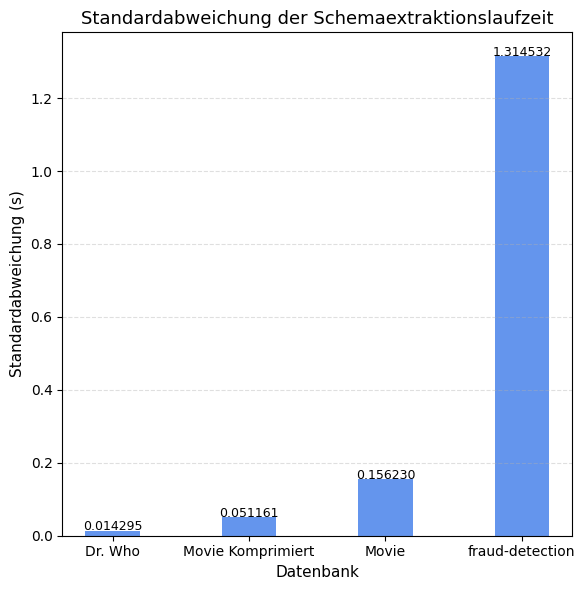

In [96]:


std_main_movie = pd.Series(dsmain).std()
std_main_movie_small = pd.Series(dsmain_movie_small).std()
std_who = pd.Series(dsmain_who).std()
std_fraud = pd.Series(dsmain_fraud).std()


daten = {
    "Datenbank": ["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"],
    "Standardabweichung (s)": [std_who, std_main_movie_small, std_main_movie, std_fraud]
}

df = pd.DataFrame(daten)


plt.figure(figsize=(6, 6))
bars = plt.bar(df["Datenbank"], df["Standardabweichung (s)"], color="cornflowerblue", width=0.4)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.00005, f"{yval:.6f}", ha='center', fontsize=9)

plt.title("Standardabweichung der Schemaextraktionslaufzeit", fontsize=13)
plt.xlabel("Datenbank", fontsize=11)
plt.ylabel("Standardabweichung (s)", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

In [97]:
mean_main_movie = dsmain.mean()
mean_main_movie_small = dsmain_movie_small.mean()
mean_who = dsmain_who.mean()
mean_fraud = dsmain_fraud.mean()

In [98]:
mean_grouping_movie = dsgrouping.mean()
mean_grouping_who = dsgrouping_who.mean()
mean_grouping_movie_small = dsgrouping_small.mean()
mean_grouping_fraud = dsgrouping_fraud.mean()

mean_grouping_fraud

34.56158612251283

In [99]:
mean_mapping_movie = dsmapping_movie.mean()
mean_mapping_who = dsmapping_who.mean()
mean_mapping_movie_small = dsmapping_movie_small.mean()
mean_mapping_fraud = dsmapping_fraud.mean()

In [100]:
runtime_movie =mean_main_movie + mean_grouping_movie
runtime_who = mean_who + mean_grouping_who
runtime_movie_small = mean_grouping_movie_small + mean_grouping_movie_small
runtime_fraud = mean_fraud + mean_grouping_fraud



In [101]:
dsmapping_movie.mean()

13.545794758796692

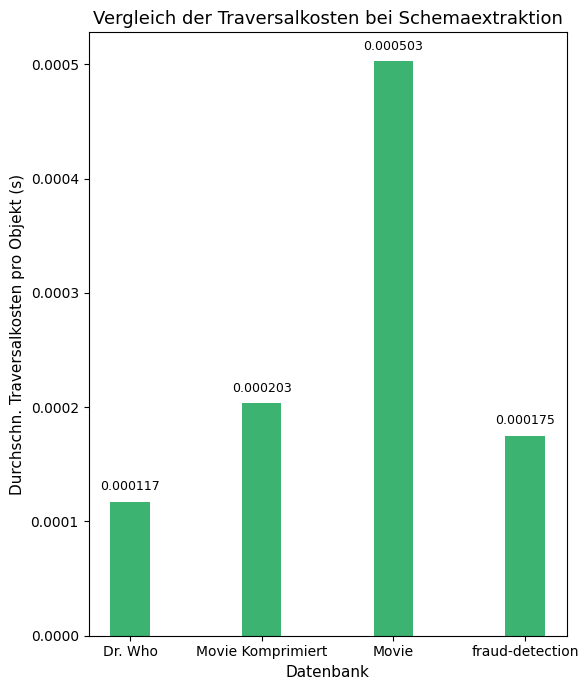

In [102]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    "Datenbank": ["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"],
    "Knoten": [1060, 28863, 28863, 332973],
    "Kanten": [2286, 66261, 166261, 980098],
    "Beziehungsdichte": [2.1566, 2.0878, 5.7603, 2.9434],
    "Laufzeit (s)": [runtime_who, runtime_movie_small, runtime_movie, runtime_fraud]
}

df = pd.DataFrame(data)
df["Objekte"] = df["Knoten"] + df["Kanten"]
df["Sekunden pro Objekt"] = df["Laufzeit (s)"] / df["Objekte"]
df["Strukturgewichtete Extraktionszeit"] = df["Sekunden pro Objekt"] * df["Beziehungsdichte"]

# Visualisierung
plt.figure(figsize=(6, 7))
bars = plt.bar(df["Datenbank"], df["Strukturgewichtete Extraktionszeit"], color="mediumseagreen", width=0.3)

# Werte auf den Balken anzeigen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.00001, f"{yval:.6f}", ha='center', fontsize=9)

# Beschriftungen überarbeitet
plt.title("Vergleich der Traversalkosten bei Schemaextraktion", fontsize=13)
plt.xlabel("Datenbank", fontsize=11)
plt.ylabel("Durchschn. Traversalkosten pro Objekt (s)", fontsize=11)

plt.tight_layout()
plt.show()

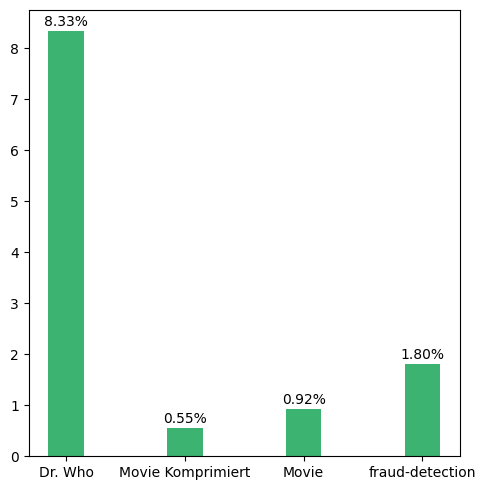

In [103]:
plt.figure(figsize=(5,5))
bars = plt.bar(["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"],
               [8.33, 0.55, 0.92, 1.80],
               color="mediumseagreen", width=0.3)

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center')



plt.tight_layout()
plt.show()

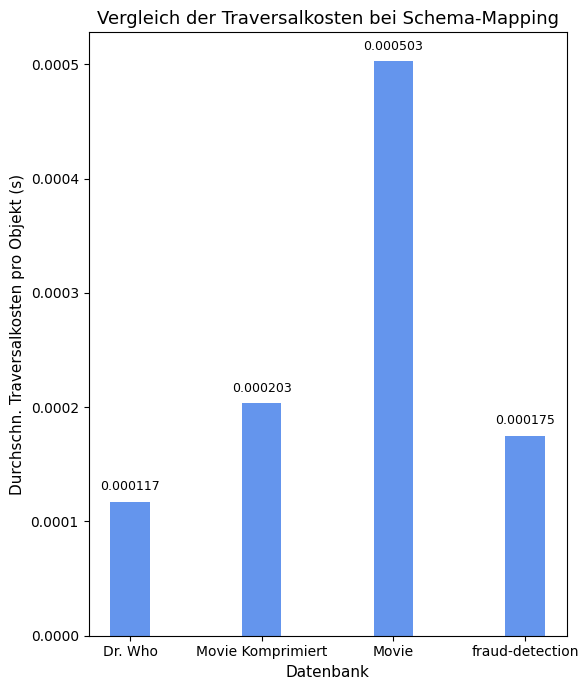

In [104]:

data1 = {
    "Datenbank": ["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"],
    "Knoten": [1060, 28863, 28863, 332973],
    "Kanten": [2286, 66261, 166261, 980098],
    "Beziehungsdichte": [2.1566, 2.0878, 5.7603, 2.9434],
    "Laufzeit (s)": [dsmapping_who.mean(), dsmapping_movie_small.mean(), dsmapping_movie.mean(), dsmapping_fraud.mean()],
}

df = pd.DataFrame(data)
df["Objekte"] = df["Knoten"] + df["Kanten"]
df["Sekunden pro Objekt"] = df["Laufzeit (s)"] / df["Objekte"]
df["Strukturgewichtete Extraktionszeit"] = df["Sekunden pro Objekt"] * df["Beziehungsdichte"]


plt.figure(figsize=(6, 7))
bars = plt.bar(df["Datenbank"], df["Strukturgewichtete Extraktionszeit"], color="cornflowerblue", width=0.3)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.00001, f"{yval:.6f}", ha='center', fontsize=9)


plt.title("Vergleich der Traversalkosten bei Schema-Mapping", fontsize=13)
plt.xlabel("Datenbank", fontsize=11)
plt.ylabel("Durchschn. Traversalkosten pro Objekt (s)", fontsize=11)

plt.tight_layout()
plt.show()

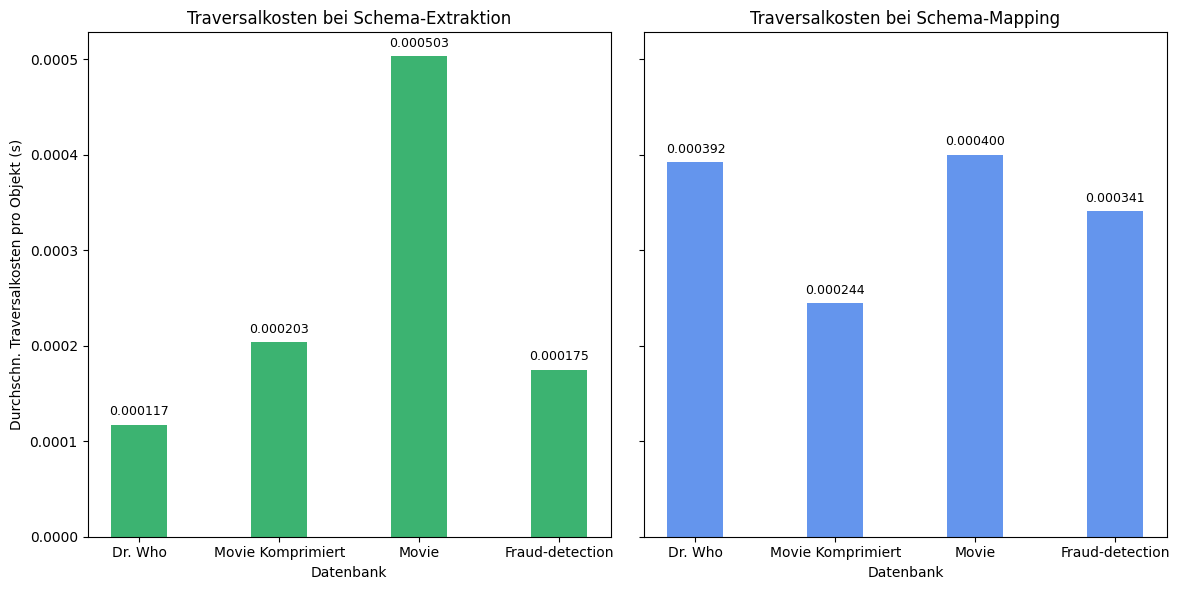

In [105]:

data = {
    "Datenbank": ["Dr. Who", "Movie Komprimiert", "Movie", "Fraud-detection"],
    "Knoten": [1060, 28863, 28863, 332973],
    "Kanten": [2286, 66261, 166261, 980098],
    "Beziehungsdichte": [2.1566, 2.0878, 5.7603, 2.9434],
    "Laufzeit (s)": [runtime_who, runtime_movie_small, runtime_movie, runtime_fraud]
}
data1 = {
    "Datenbank": ["Dr. Who", "Movie Komprimiert", "Movie", "Fraud-detection"],
    "Knoten": [1060, 28863, 28863, 332973],
    "Kanten": [2286, 66261, 166261, 980098],
    "Beziehungsdichte": [2.1566, 2.0878, 5.7603, 2.9434],
    "Laufzeit (s)": [dsmapping_who.mean(), dsmapping_movie_small.mean(), dsmapping_movie.mean(), dsmapping_fraud.mean()],
}
df_extraktion = pd.DataFrame(data)
df_extraktion["Laufzeit (s)"] = [runtime_who, runtime_movie_small, runtime_movie, runtime_fraud]
df_extraktion["Objekte"] = df_extraktion["Knoten"] + df_extraktion["Kanten"]
df_extraktion["Sekunden pro Objekt"] = df_extraktion["Laufzeit (s)"] / df_extraktion["Objekte"]
df_extraktion["Strukturgewichtete Extraktionszeit"] = df_extraktion["Sekunden pro Objekt"] * df_extraktion["Beziehungsdichte"]


df_mapping = pd.DataFrame(data1)
df_mapping["Laufzeit (s)"] = [
    dsmapping_who.mean(),
    dsmapping_movie_small.mean(),
    dsmapping_movie.mean(),
    dsmapping_fraud.mean()
]
df_mapping["Objekte"] = df_mapping["Knoten"] + df_mapping["Kanten"]
df_mapping["Sekunden pro Objekt"] = df_mapping["Laufzeit (s)"] / df_mapping["Objekte"]
df_mapping["Strukturgewichtete Extraktionszeit"] = df_mapping["Sekunden pro Objekt"] * df_mapping["Beziehungsdichte"]


fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


bars1 = axes[0].bar(df_extraktion["Datenbank"], df_extraktion["Strukturgewichtete Extraktionszeit"],
                    color="mediumseagreen", width=0.4)
axes[0].set_title("Traversalkosten bei Schema-Extraktion", fontsize=12)
axes[0].set_xlabel("Datenbank")
axes[0].set_ylabel("Durchschn. Traversalkosten pro Objekt (s)")
for bar in bars1:
    y = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, y + 0.00001, f"{y:.6f}", ha='center', fontsize=9)


bars2 = axes[1].bar(df_mapping["Datenbank"], df_mapping["Strukturgewichtete Extraktionszeit"],
                    color="cornflowerblue", width=0.4)
axes[1].set_title("Traversalkosten bei Schema-Mapping", fontsize=12)
axes[1].set_xlabel("Datenbank")
for bar in bars2:
    y = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, y + 0.00001, f"{y:.6f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

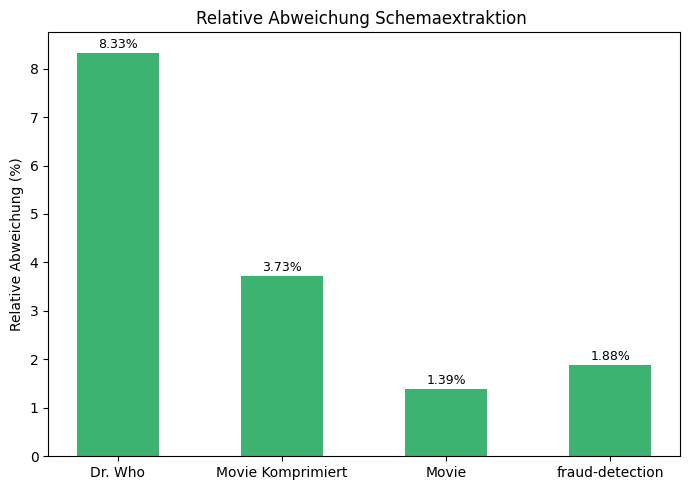

In [106]:

dsextraktion_who = dsmain_who + dsgrouping_who
dsextraktion_movie_small = dsmain_movie_small + dsgrouping_small
dsextraktion_movie = dsmain + dsgrouping
dsextraktion_fraud = dsmain_fraud + dsgrouping_fraud


def calc_relative(values):
    return (values.std() / values.mean()) * 100

rel_std_extraktion = [
    calc_relative(dsextraktion_who),
    calc_relative(dsextraktion_movie_small),
    calc_relative(dsextraktion_movie),
    calc_relative(dsextraktion_fraud)
]

labels = ["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"]


plt.figure(figsize=(7, 5))
bars = plt.bar(labels, rel_std_extraktion, color="mediumseagreen", width=0.5)


for i, bar in enumerate(bars):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center', fontsize=9)

plt.ylabel("Relative Abweichung (%)")
plt.title("Relative Abweichung Schemaextraktion ")
plt.tight_layout()
plt.show()

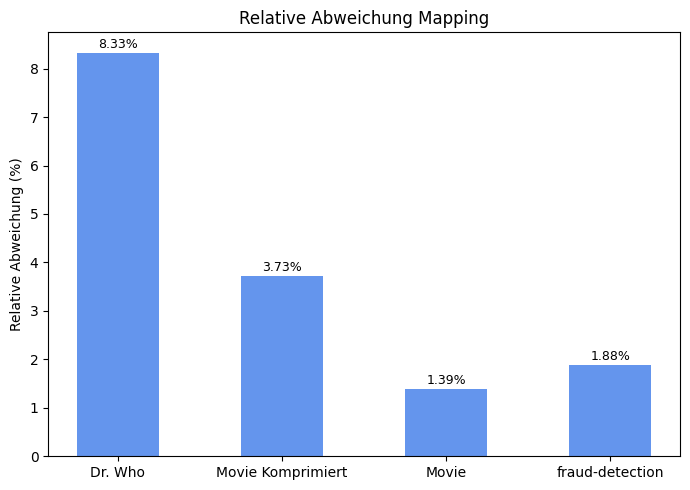

In [107]:

dsextraktion_who = dsmapping_who
dsextraktion_movie_small = dsmapping_movie_small
dsextraktion_movie = dsmapping_movie
dsextraktion_fraud = dsmapping_fraud


def calc_relative(values):
    return (values.std() / values.mean()) * 100

rel_std_mapping = [
    calc_relative(dsextraktion_who),
    calc_relative(dsextraktion_movie_small),
    calc_relative(dsextraktion_movie),
    calc_relative(dsextraktion_fraud)
]

labels = ["Dr. Who", "Movie Komprimiert", "Movie", "fraud-detection"]


plt.figure(figsize=(7, 5))
bars = plt.bar(labels, rel_std_extraktion, color="cornflowerblue", width=0.5)


for i, bar in enumerate(bars):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center', fontsize=9)

plt.ylabel("Relative Abweichung (%)")
plt.title("Relative Abweichung Mapping")
plt.tight_layout()
plt.show()

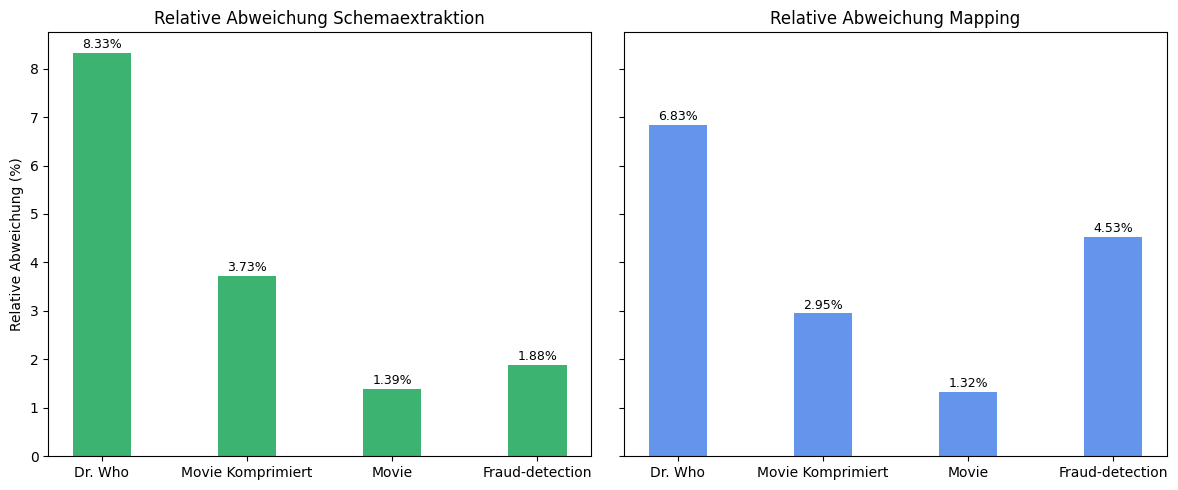

In [108]:

labels = ["Dr. Who", "Movie Komprimiert", "Movie", "Fraud-detection"]
x = range(len(labels))


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

bars1 = axes[0].bar(x, rel_std_extraktion, color="mediumseagreen", width=0.4)
axes[0].set_title("Relative Abweichung Schemaextraktion")
axes[0].set_ylabel("Relative Abweichung (%)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)


for i, bar in enumerate(bars1):
    y = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center', fontsize=9)


bars2 = axes[1].bar(x, rel_std_mapping, color="cornflowerblue", width=0.4)
axes[1].set_title("Relative Abweichung Mapping")
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)

for i, bar in enumerate(bars2):
    y = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

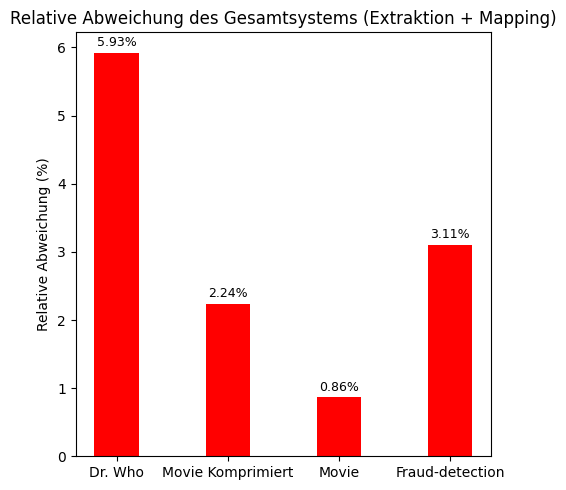

In [109]:

dssystem_who = dsmain_who + dsgrouping_who + dsmapping_who
dssystem_movie_small = dsmain_movie_small + dsgrouping_small + dsmapping_movie_small
dssystem_movie = dsmain + dsgrouping + dsmapping_movie
dssystem_fraud = dsmain_fraud + dsgrouping_fraud + dsmapping_fraud

# Relative Abweichung berechnen
def calc_relative(values):
    return (values.std() / values.mean()) * 100

rel_system = [
    calc_relative(dssystem_who),
    calc_relative(dssystem_movie_small),
    calc_relative(dssystem_movie),
    calc_relative(dssystem_fraud)
]


labels = ["Dr. Who", "Movie Komprimiert", "Movie", "Fraud-detection"]
plt.figure(figsize=(5, 5))
bars = plt.bar(labels, rel_system, color="red", width=0.4)

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f}%", ha='center', fontsize=9)

plt.ylabel("Relative Abweichung (%)")
plt.title("Relative Abweichung des Gesamtsystems (Extraktion + Mapping)")
plt.tight_layout()
plt.show()